In [1]:
import sys; sys.path.append('..')
from mvtecad_test import *
from fastai.callbacks import SaveModelCallback
fastai_progress_as_text()

PATH = Path('/mnt/dataset/mvtec_ad')

mvtecad = MVTecADTest(PATH, skip_data_creation=True)

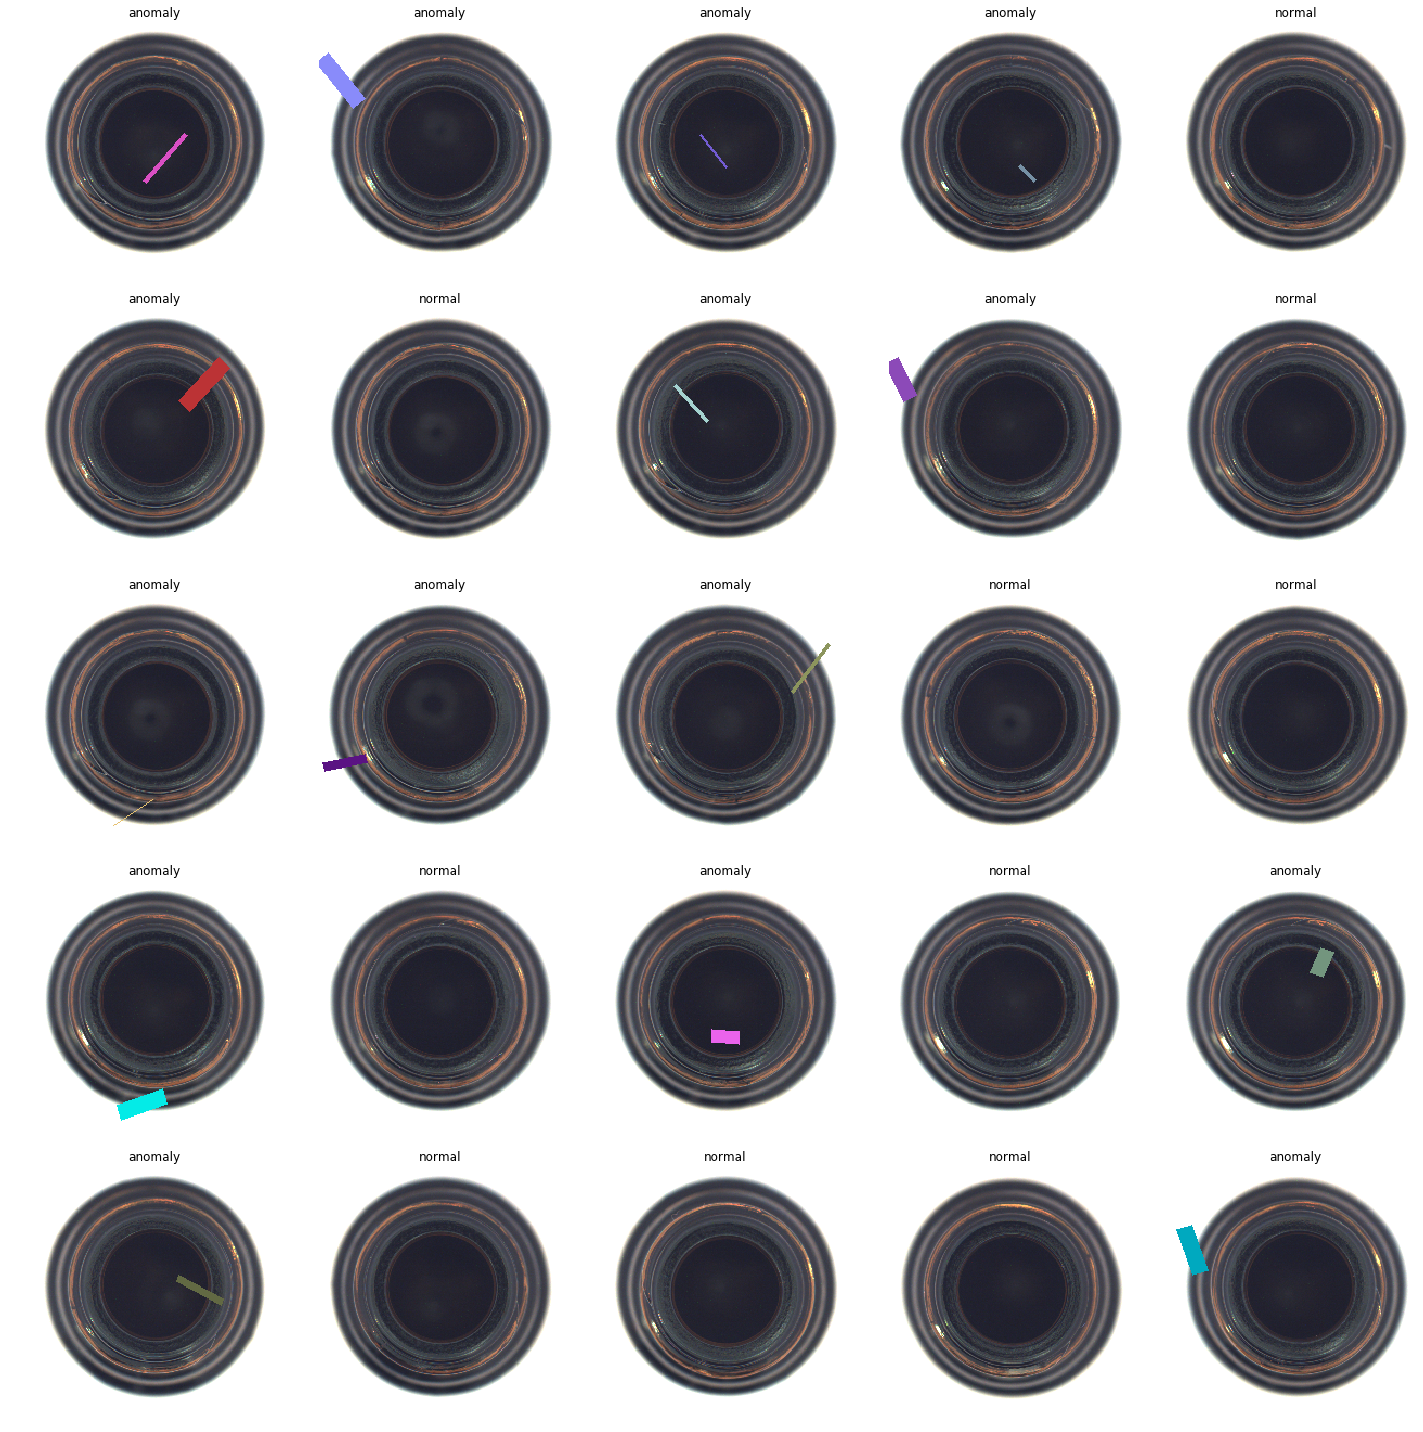

In [2]:
mvtecad.set_test(0, 0)
mvtecad.databunch().show_batch()

In [ ]:
def learner_conventional(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_L2ConstrainedNet(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.model = L2ConstrainedNet(learn.model)
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_ArcFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CosFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, AddMarginProduct, m=0.4)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_SphereFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, SphereProduct, m=int(4))
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CenterLoss(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.loss_func = WrapCenterLoss(learn, train_data, weight_cent=1/8)
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

model_defs = {
    'Conventional': learner_conventional,
    'L2Constrained': learner_L2ConstrainedNet,
    'ArcFace': learner_ArcFace,
    'CosFace': learner_CosFace,
    'SphereFace': learner_SphereFace,
    'CenterLoss': learner_CenterLoss,
}
for name, learner_fn in model_defs.items():
    mvtecad.do_tests(name, learner_fn, visualize=[5, 9, 13])

# Stat: AUC


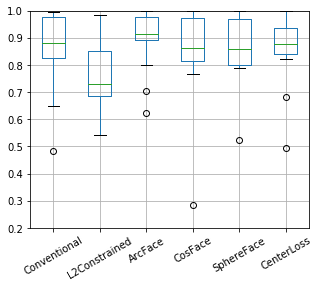

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
bottle,0.980159,0.983333,0.996825,0.998413,1,0.998413
cable,0.914543,0.72545,0.910701,0.880435,0.859633,0.922789
capsule,0.820503,0.636219,0.897487,0.808935,0.791384,0.836059
carpet,0.9374,0.852528,0.915329,0.881621,0.79053,0.890048
grid,0.649123,0.685464,0.798663,0.780284,0.850459,0.68254
hazelnut,0.996429,0.82125,0.991786,0.970357,0.982143,0.978929
leather,0.977921,0.852412,0.977582,0.979959,0.980978,0.82269
metal_nut,0.847996,0.684751,0.913001,0.833822,0.931085,0.866569
pill,0.846699,0.736225,0.703219,0.76814,0.793781,0.85761
screw,0.483501,0.541197,0.623283,0.284075,0.522853,0.495388


# Stat: Normalized distances


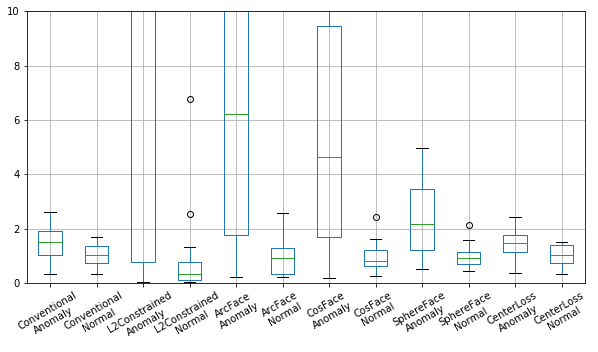

In [4]:
normalized_anomaly_distances, normalized_normal_distances, aucs = mvtecad.test_summary(dist_range=[0, 10])

In [27]:
paper_compatible_table2(mvtecad)

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
index,,,,,,
carpet-TPR,0.786517,0.764045,0.865169,0.674157,0.640449,0.775281
carpet-TNR,1.000000,0.857143,0.857143,1.000000,0.821429,0.928571
grid-TPR,0.368421,0.421053,0.543860,0.684211,0.789474,0.614035
grid-TNR,0.904762,0.904762,0.952381,0.857143,0.809524,0.761905
leather-TPR,0.880435,0.739130,0.934783,0.934783,0.934783,0.608696
leather-TNR,1.000000,0.937500,0.937500,1.000000,1.000000,0.968750
tile-TPR,0.928571,0.738095,0.928571,0.892857,0.892857,0.833333
tile-TNR,0.939394,1.000000,0.939394,1.000000,1.000000,0.969697
wood-TPR,0.950000,0.766667,0.916667,0.933333,0.933333,0.933333
